***CYBERBULLING SENTIMENT ANALYSIS***

*ABOUT THE DATASET*

Context.

This dataset is one out of 8 collection of datasets from different sources related to the automatic detection of cyber-bullying.
The data is from different social media platforms like Kaggle, Twitter, Wikipedia Talk pages and YouTube.


Content.
The data contains different types of cyber-bullying, on this case we are going to analyze toxicity.
The data contain text and labeled as bullying or not.




the previous information about the dataset was taken from the dataset website source: https://www.kaggle.com/datasets/saurabhshahane/cyberbullying-dataset?resource=download, and adapted to our project proposal.

In [24]:
#Import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from collections import Counter
import matplotlib.pyplot as plt


nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
#Reading from Kaggle API and unzipping the file locally

!pip install kaggle

import pandas as pd
from io import BytesIO
from zipfile import ZipFile
import os

# Upload Kaggle API Credentials
from google.colab import files
files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"brayanleonardogil","key":"5ae7a5e602ef46d8c838992f78ad12da"}'}

In [26]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
import kaggle

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
#Load the dataset

#df = pd.read_csv('toxicity_parsed_dataset.csv') #This is here to read the file locally

dataset = 'saurabhshahane/cyberbullying-dataset'
file_name = 'toxicity_parsed_dataset.csv'

# Download the file content into memory
download_path = 'cyberbullying-dataset'

# Download the dataset files and unzip them into the specified path
kaggle.api.dataset_download_files(dataset, path=download_path, unzip=True)


# Construct the file path
file_path = os.path.join(download_path, file_name)

# Load the specific file into a pandas DataFrame
df = pd.read_csv(file_path)

print(df.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-07-12 02:09:53,589 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /api/v1/datasets/download/saurabhshahane/cyberbullying-dataset?datasetVersionNumber=None


Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/cyberbullying-dataset


/usr/local/lib/python3.10/dist-packages/kaggle/api_client.py:165: DeprecationWarning: HTTPResponse.getheaders() is deprecated and will be removed in urllib3 v2.1.0. Instead access HTTPResponse.headers directly.
  response_data.getheaders())


   index                                               Text  ed_label_0  \
0      0  This: :One can make an analogy in mathematical...         0.9   
1      1  `  :Clarification for you  (and Zundark's righ...         1.0   
2      2                          Elected or Electoral? JHK         1.0   
3      3  `This is such a fun entry.   Devotchka  I once...         1.0   
4      4  Please relate the ozone hole to increases in c...         0.8   

   ed_label_1  oh_label  
0         0.1         0  
1         0.0         0  
2         0.0         0  
3         0.0         0  
4         0.2         0  


*EXPLORING THE DATASET*

In [29]:
#Data description

print(df.describe())


              index     ed_label_0     ed_label_1       oh_label
count  159686.00000  159686.000000  159686.000000  159686.000000
mean    79842.50000       0.854951       0.145049       0.096201
std     46097.52188       0.253866       0.253866       0.294868
min         0.00000       0.000000       0.000000       0.000000
25%     39921.25000       0.800000       0.000000       0.000000
50%     79842.50000       1.000000       0.000000       0.000000
75%    119763.75000       1.000000       0.200000       0.000000
max    159685.00000       1.000000       1.000000       1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
#Dataset shape

print(df.shape)


(159686, 5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
#Data info

print(df.info())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159686 entries, 0 to 159685
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       159686 non-null  int64  
 1   Text        159686 non-null  object 
 2   ed_label_0  159686 non-null  float64
 3   ed_label_1  159686 non-null  float64
 4   oh_label    159686 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 6.1+ MB
None


In [32]:
#Label distribution

print(df['oh_label'].value_counts())


oh_label
0    144324
1     15362
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
#Unique values

df.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index         159686
Text          159388
ed_label_0        66
ed_label_1        66
oh_label           2
dtype: int64

In [34]:
#Print text samples of each label

print('_________Text Samples_________')
sample_tweet_0 = df[df['ed_label_0'] == 1]['Text'].iloc[0]
print('\nSample No Toxic Tweet: ', sample_tweet_0)
sexist_tweet = df[df['ed_label_1'] == 1]['Text'].iloc[0]
print('\n\nSample Toxic Tweet: ', sexist_tweet)
print('\n_______________________________')

_________Text Samples_________

Sample No Toxic Tweet:  `  :Clarification for you  (and Zundark's right, i should have checked the Wikipedia bugs page first).   This is a ``bug`` in the code that makes wikipedia work  it just means that there is a line of code that may have an error as small as an extra space. It's analogous (in a VERY simplified way) to trying to make something bold in HTML and forgetting to put the  at the end, so you'd see something like this:  words in bold  Instead of this:  words in bold   It's not like a virus, that is code somebody deliberately wrote in order to infect your computer and damage files, so it won't ``go around.`` JHK   `


Sample Toxic Tweet:  i have a dick, its bigger than yours! hahaha

_______________________________


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**DATA PREPROCESSING**

In [35]:
#Drop index column

df = df.drop(['index'], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
#Features and target

X = df['Text']
y = df['oh_label']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
#Split dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*Data Cleaning*

In [38]:
#Look for missing values

print(df.isnull().any())
print(df.isnull().sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text          False
ed_label_0    False
ed_label_1    False
oh_label      False
dtype: bool
Text          0
ed_label_0    0
ed_label_1    0
oh_label      0
dtype: int64


In [39]:
# Define function to clean text
def text_cleaning(text):

     # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions (@user) and hashtags (#hashtag)
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = text.strip()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Use Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
#Adding sentiment features
from textblob import TextBlob

def add_sentiment_features(df):
    df['sentiment_polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['sentiment_subjectivity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    return df

df = add_sentiment_features(df)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.008*"english" + 0.007*"people" + 0.007*"country" + 0.007*"american" + 0.006*"state" + 0.006*"war" + 0.006*"states" + 0.006*"world" + 0.006*"united" + 0.006*"penis"'), (1, '0.032*"edit" + 0.028*"wikipedia" + 0.026*"page" + 0.022*"edits" + 0.019*"user" + 0.018*"talk" + 0.014*"editing" + 0.013*"block" + 0.013*"blocked" + 0.012*"editors"'), (2, '0.069*"style" + 0.053*"px" + 0.037*"align" + 0.031*"color" + 0.029*"background" + 0.027*"vertical" + 0.027*"padding" + 0.025*"middle" + 0.022*"shit" + 0.020*"border"'), (3, '0.064*"article" + 0.033*"page" + 0.025*"wikipedia" + 0.022*"articles" + 0.016*"wp" + 0.012*"added" + 0.011*"content" + 0.011*"add" + 0.011*"deleted" + 0.011*"talk"'), (4, '0.066*"http" + 0.055*"com" + 0.040*"www" + 0.040*"org" + 0.038*"wiki" + 0.032*"en" + 0.024*"fucking" + 0.022*"https" + 0.019*"asshole" + 0.014*"music"'), (5, '0.047*"fuck" + 0.044*"image" + 0.029*"copyright" + 0.027*"file" + 0.025*"use" + 0.023*"images" + 0.023*"ass" + 0.016*"wikipedia" + 0.015*"jpg" 

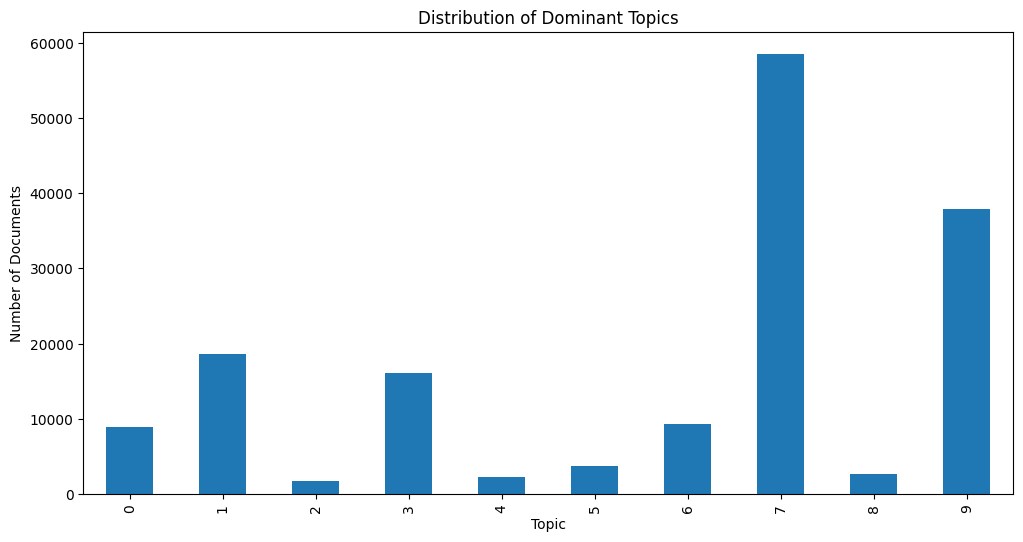

In [41]:
#Topic Modeling #30 min
!pip install pyLDAvis

import gensim
from gensim import corpora
from gensim.models import LdaMulticore
from gensim.parsing.preprocessing import STOPWORDS
import pyLDAvis.gensim_models

# Function to preprocess text for LDA
def preprocess_text(text):
    # Tokenize the text
    tokens = gensim.utils.simple_preprocess(text)
    # Remove stopwords
    return [token for token in tokens if token not in STOPWORDS]

# Preprocess the texts
processed_texts = df['Text'].apply(preprocess_text)

# Create a dictionary from the texts
dictionary = corpora.Dictionary(processed_texts)

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Set training parameters
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

# Train LDA model
model = LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    num_topics=num_topics,
    random_state=100,
    chunksize=chunksize,
    passes=passes,
    iterations=iterations,
    eval_every=eval_every
)

# Print the topics
print(model.print_topics())

# Visualize the topics
vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_visualization.html')

# Function to get the dominant topic for each document
def get_dominant_topic(ldamodel, corpus, texts):
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus):
        topic_percs = ldamodel.get_document_topics(corp, minimum_probability=0)
        dominant_topic = sorted(topic_percs, key=lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append(dominant_topic)
        topic_percentages.append(topic_percs)
    return dominant_topics, topic_percentages
# Get dominant topic for each document
dominant_topics, topic_percentages = get_dominant_topic(model, corpus, processed_texts)

# Add dominant topic to the dataframe
df['dominant_topic'] = dominant_topics

# View results
print(df[['Text', 'dominant_topic', 'oh_label']].head(10))

# Analyze topic distribution
topic_counts = df['dominant_topic'].value_counts().sort_index()
print("\nTopic Distribution:")
print(topic_counts)

# Visualize topic distribution
plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar')
plt.title('Distribution of Dominant Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.show()

In [42]:
df.to_csv('sentiment_and_topics.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# Apply text cleaning to the training and testing sets
X_train = X_train.apply(text_cleaning)
X_test = X_test.apply(text_cleaning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# Word frequency analysis
all_words = ' '.join(X_train).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(40)

# Display the top 40 words
print("Top 40 most common words:")
for word, freq in common_words:
    print(f"{word}, {freq}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 40 most common words:
article, 58509
page, 45334
wikipedia, 29004
please, 24116
one, 24061
would, 23571
like, 22795
dont, 21008
see, 17574
source, 17173
think, 16660
also, 16622
know, 16099
im, 15675
talk, 15485
time, 15226
people, 15034
edit, 14139
use, 13197
make, 13051
may, 12464
get, 11735
say, 11471
need, 11237
thanks, 11188
even, 10861
link, 10835
user, 10512
name, 10439
want, 10289
good, 10098
information, 9710
could, 9676
well, 9617
way, 9586
go, 9584
comment, 9473
editor, 9401
image, 9333
section, 9115


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


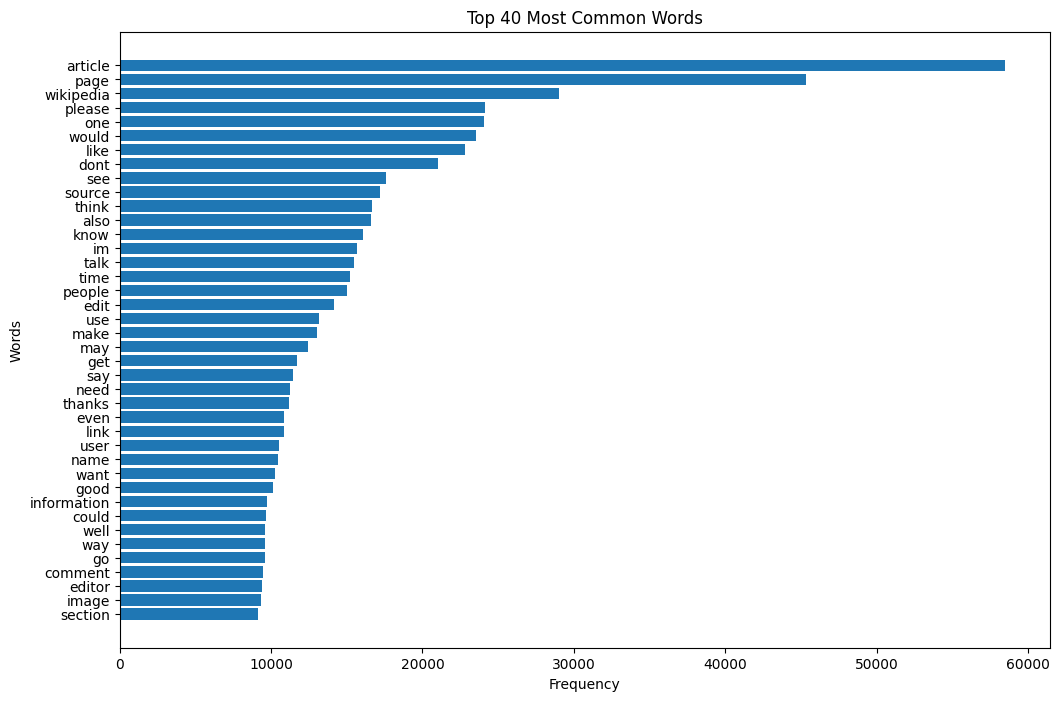

In [45]:
import matplotlib.pyplot as plt
# Plot the top 40 words

words, frequencies = zip(*common_words)
plt.figure(figsize=(12, 8))
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 40 Most Common Words')
plt.gca().invert_yaxis()
plt.show()

**FEATURE ENGINEERING**

In [46]:
# Define a pipeline with TF-IDF vectorizer and Logistic Regression model
from sklearn.feature_selection import SelectKBest, chi2

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('select', SelectKBest(chi2, k='all')),
    ('clf', LogisticRegression(solver='liblinear'))
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'tfidf__max_df': [0.7, 0.8, 0.9, 1.0],
    'tfidf__min_df': [1, 2, 3],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__max_features': [None, 5000, 10000],
    'clf__C': [0.1, 1, 10, 100]
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')


In [ ]:

# Display the best parameters
print(f'Best Parameters: {grid_search.best_params_}')